In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(13, 7))

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
#from sklearn.metrics import mean_squared_error
from math import sqrt

from pandas.plotting import register_matplotlib_converters
#from statsmodels.tsa.api import Holt

#from acquire import get_store_data, opsd_germany_daily
#import prepare
import pytz
from pytz import timezone

### Bringing in the CSV

In [2]:
data_file = 'eurusd_minute.csv' 
df = pd.read_csv(data_file, parse_dates=[['Date', 'Time']]) 
df.head()

,Date_Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-01-02 18:29:00,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0
1,2005-01-02 18:38:00,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0
2,2005-01-02 18:51:00,1.3562,1.3562,1.3562,1.3562,0.0,1.3572,1.3572,1.3572,1.3572,0.0
3,2005-01-02 18:52:00,1.3560,1.3560,1.3560,1.3560,0.0,1.3570,1.3570,1.3570,1.3570,0.0
4,2005-01-02 18:55:00,1.3563,1.3563,1.3563,1.3563,0.0,1.3573,1.3573,1.3573,1.3573,0.0


In [3]:
df.Date_Time = pd.to_datetime(df.Date_Time)

### Changing Time Zone to CST

In [4]:
tz = pytz.timezone('America/Detroit')
tz.localize(datetime.utcnow())

datetime.datetime(2020, 12, 4, 15, 23, 1, 940854, tzinfo=<DstTzInfo 'America/Detroit' EST-1 day, 19:00:00 STD>)

In [5]:
df.info(), df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618819 entries, 0 to 5618818
Data columns (total 11 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_Time  datetime64[ns]
 1   BO         float64       
 2   BH         float64       
 3   BL         float64       
 4   BC         float64       
 5   BCh        float64       
 6   AO         float64       
 7   AH         float64       
 8   AL         float64       
 9   AC         float64       
 10  ACh        float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 471.6 MB


(None, (5618819, 11))

In [6]:
df = df[~(df['Date_Time'] < '2017-01-01')]

In [7]:
df.shape

(1200543, 11)

In [8]:
df.rename(columns={'BO':'bid_open',
                  'BH':'bid_high',
                  'BL':'bid_low',
                  'BC':'bid_close',
                  'BCh':'bid_change',
                  'AO':'ask_open',
                  'AH':'ask_high',
                  'AL':'ask_low',
                  'AC':'ask_close',
                  'ACh':'ask_change'}, inplace=True)

In [9]:
df['close'] = (df.bid_close + df.ask_close) / 2
df['date'] = df['Date_Time'].dt.date
df['date'] = df['date'].astype(str)

In [10]:
#df = df.set_index('Date_Time').sort_index()
#df = df[['Close','Volume']]

In [11]:
df.head()

,Date_Time,bid_open,bid_high,bid_low,bid_close,bid_change,ask_open,ask_high,ask_low,ask_close,ask_change,close,date
4418276,2017-01-02 23:00:00,1.04660,1.04671,1.04636,1.04658,0.00002,1.04717,1.04717,1.04686,1.04694,0.00023,1.046760,2017-01-02
4418277,2017-01-02 23:01:00,1.04661,1.04695,1.04659,1.04672,-0.00011,1.04695,1.04733,1.04693,1.04709,-0.00014,1.046905,2017-01-02
4418278,2017-01-02 23:02:00,1.04674,1.04697,1.04658,1.04662,0.00012,1.04703,1.04726,1.04695,1.04696,0.00007,1.046790,2017-01-02
4418279,2017-01-02 23:03:00,1.04660,1.04666,1.04631,1.04666,-0.00006,1.04693,1.04696,1.04671,1.04692,0.00001,1.046790,2017-01-02
4418280,2017-01-02 23:04:00,1.04654,1.04657,1.04626,1.04637,0.00017,1.04698,1.04698,1.04663,1.04672,0.00026,1.046545,2017-01-02


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200543 entries, 4418276 to 5618818
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date_Time   1200543 non-null  datetime64[ns]
 1   bid_open    1200543 non-null  float64       
 2   bid_high    1200543 non-null  float64       
 3   bid_low     1200543 non-null  float64       
 4   bid_close   1200543 non-null  float64       
 5   bid_change  1200543 non-null  float64       
 6   ask_open    1200543 non-null  float64       
 7   ask_high    1200543 non-null  float64       
 8   ask_low     1200543 non-null  float64       
 9   ask_close   1200543 non-null  float64       
 10  ask_change  1200543 non-null  float64       
 11  close       1200543 non-null  float64       
 12  date        1200543 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 128.2+ MB


In [13]:
### Trading Times 2200-2259

twen_2 = (df.Date_Time.dt.hour >= 22) & (df.Date_Time.dt.hour <= 22)

df_22 = df[twen_2]
df_22.shape

(43310, 13)

In [14]:
### Trading Times 0600-0659

six = (df['Date_Time'].dt.hour >= 6) & \
            (df['Date_Time'].dt.hour <= 6)

df_6 = df[six]
df_6.shape

(51128, 13)

In [15]:
### Trading Times 0400-0559

four = (df['Date_Time'].dt.hour >= 4) & \
            (df['Date_Time'].dt.hour <= 5)

df_4 = df[four]
df_4.shape

(98826, 13)

In [16]:
### Trading Times 0500-0559

five = (df['Date_Time'].dt.hour >= 5) & \
            (df['Date_Time'].dt.hour <= 5)

df_5 = df[five]
df_5.shape
df_5

,Date_Time,bid_open,bid_high,bid_low,bid_close,bid_change,ask_open,ask_high,ask_low,ask_close,ask_change,close,date
4418630,2017-01-03 05:00:00,1.04876,1.04878,1.04876,1.04878,-0.00002,1.04888,1.04892,1.04888,1.04892,-0.00004,1.048850,2017-01-03
4418631,2017-01-03 05:01:00,1.04878,1.04882,1.04876,1.04881,-0.00003,1.04891,1.04895,1.04890,1.04894,-0.00003,1.048875,2017-01-03
4418632,2017-01-03 05:02:00,1.04882,1.04882,1.04878,1.04878,0.00004,1.04895,1.04895,1.04894,1.04894,0.00001,1.048860,2017-01-03
4418633,2017-01-03 05:03:00,1.04880,1.04888,1.04880,1.04888,-0.00008,1.04895,1.04902,1.04895,1.04902,-0.00007,1.048950,2017-01-03
4418634,2017-01-03 05:04:00,1.04888,1.04888,1.04879,1.04879,0.00009,1.04901,1.04901,1.04893,1.04893,0.00008,1.048860,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617781,2020-04-29 05:55:00,1.08538,1.08539,1.08529,1.08532,0.00006,1.08552,1.08553,1.08545,1.08547,0.00005,1.085395,2020-04-29
5617782,2020-04-29 05:56:00,1.08534,1.08536,1.08527,1.08528,0.00006,1.08549,1.08550,1.08540,1.08542,0.00007,1.085350,2020-04-29
5617783,2020-04-29 05:57:00,1.08526,1.08528,1.08523,1.08525,0.00001,1.08541,1.08541,1.08537,1.08537,0.00004,1.085310,2020-04-29
5617784,2020-04-29 05:58:00,1.08526,1.08536,1.08526,1.08533,-0.00007,1.08539,1.08549,1.08539,1.08547,-0.00008,1.085400,2020-04-29


In [17]:
#df_5.date.unique()
df_5.describe()

,bid_open,bid_high,bid_low,bid_close,bid_change,ask_open,ask_high,ask_low,ask_close,ask_change,close
count,49813.000000,49813.000000,49813.000000,49813.000000,49813.000000,49813.000000,49813.000000,49813.000000,49813.000000,4.981300e+04,49813.000000
mean,1.139776,1.139826,1.139726,1.139777,-0.000001,1.139913,1.139963,1.139863,1.139913,-6.094795e-07,1.139845
std,0.046069,0.046078,0.046060,0.046069,0.000090,0.046071,0.046080,0.046062,0.046071,9.032389e-05,0.046070
min,1.040150,1.040200,1.040110,1.040160,-0.002260,1.040290,1.040340,1.040250,1.040290,-2.280000e-03,1.040225
25%,1.108270,1.108300,1.108240,1.108280,-0.000040,1.108400,1.108430,1.108380,1.108410,-4.000000e-05,1.108345
50%,1.134080,1.134120,1.134020,1.134080,0.000000,1.134210,1.134260,1.134160,1.134210,0.000000e+00,1.134145
75%,1.172660,1.172710,1.172570,1.172650,0.000040,1.172800,1.172850,1.172710,1.172780,4.000000e-05,1.172715
max,1.255350,1.255440,1.255250,1.255370,0.003090,1.255500,1.255600,1.255410,1.255510,2.850000e-03,1.255440


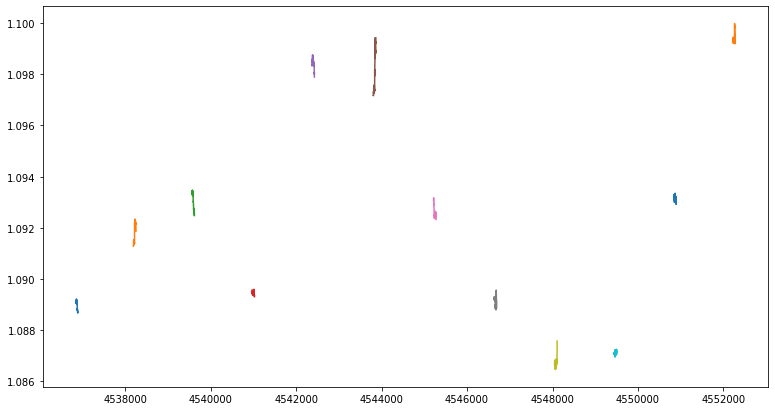

In [18]:

df_5[df_5.date == '2017-05-01'].close.plot()
df_5[df_5.date == '2017-05-02'].close.plot()
df_5[df_5.date == '2017-05-03'].close.plot()
df_5[df_5.date == '2017-05-04'].close.plot()
df_5[df_5.date == '2017-05-05'].close.plot()
df_5[df_5.date == '2017-05-08'].close.plot()
df_5[df_5.date == '2017-05-09'].close.plot()
df_5[df_5.date == '2017-05-10'].close.plot()
df_5[df_5.date == '2017-05-11'].close.plot()
df_5[df_5.date == '2017-05-12'].close.plot()
df_5[df_5.date == '2017-05-15'].close.plot()
df_5[df_5.date == '2017-05-16'].close.plot()


#d.close.plot()

In [19]:
df_5['close'].rolling(1).mean()

4418630    1.048850
4418631    1.048875
4418632    1.048860
4418633    1.048950
4418634    1.048860
             ...   
5617781    1.085395
5617782    1.085350
5617783    1.085310
5617784    1.085400
5617785    1.085555
Name: close, Length: 49813, dtype: float64

In [20]:
match_timestamp = "05:00:00"
#match_timestamp = "05:01:00"
#match_timestamp = "05:02:00"
zero = df_5.loc[df_5.index.strftime("%H:%M:%S") == match_timestamp].mean()

AttributeError: 'Int64Index' object has no attribute 'strftime'

In [ ]:
zero

In [ ]:
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:00:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:01:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:02:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:03:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:04:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:05:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:06:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:07:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:08:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:09:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:10:00'].close.plot()
df_5.loc[df_5.index.strftime("%H:%M:%S") == '05:11:00'].close.plot()

In [ ]:
df = pd.read_csv('EURUSD_M15.csv',sep='[\s,]{1,20}')#, parse_dates=[['Date', 'Time']]) 
df.head()

In [ ]:
Something like df.resample(“D”) followed by an aggregation function Like .min or .max

In [22]:
df_5.Date_Time.resample('D').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200543 entries, 4418276 to 5618818
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date_Time   1200543 non-null  datetime64[ns]
 1   bid_open    1200543 non-null  float64       
 2   bid_high    1200543 non-null  float64       
 3   bid_low     1200543 non-null  float64       
 4   bid_close   1200543 non-null  float64       
 5   bid_change  1200543 non-null  float64       
 6   ask_open    1200543 non-null  float64       
 7   ask_high    1200543 non-null  float64       
 8   ask_low     1200543 non-null  float64       
 9   ask_close   1200543 non-null  float64       
 10  ask_change  1200543 non-null  float64       
 11  close       1200543 non-null  float64       
 12  date        1200543 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 128.2+ MB
